**Acerca del conjunto de datos**

Los Premios Grammy, celebrados por primera vez en 1959, son premios otorgados por la Academia de la Grabación de los Estados Unidos para reconocer logros destacados en la música.

He notado que falta una cantidad significativa de información en los conjuntos de datos relacionados de Kaggle. Esto podría deberse a que el raspador web del usuario era demasiado simple y omitía cualquier dato que requiriera clics, o a que la información simplemente no aparece en el sitio web oficial de los Premios Grammy.

Así que me tomé mi tiempo diseñando un scraper en Python (que subiré más adelante) y consulté artículos de Wikipedia para completar la información faltante. Ahora lo he subido para mi propio uso y para cualquier otra persona interesada en la historia de la música popular.

**Importaciones**

In [5]:
# 📦 Librerías estándar
import os

# 📊 Visualización
import matplotlib.pyplot as plt
import seaborn as sns


# 🧪 Scikit-learn
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (accuracy_score,
    auc,
    classification_report,
    ConfusionMatrixDisplay,
    confusion_matrix,
    f1_score,
    mean_squared_error,
    precision_score,
    recall_score,
    roc_curve,
    RocCurveDisplay,
    r2_score,
)
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import label_binarize, OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

# 💾 Guardado de modelos
import joblib



# 📐 Numpy y Pandas
import numpy as np
import pandas as pd

**EDA**

In [6]:
path = 'C:\\Users\\gvald\\Desktop\\Proyecto2\\datasets\\dataset4.csv'
df = pd.read_csv(path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        61 non-null     int64 
 1   Ceremony    61 non-null     int64 
 2   Award ID    61 non-null     int64 
 3   Award Type  61 non-null     object
 4   Award Name  61 non-null     object
 5   Work        61 non-null     object
 6   Nominee     61 non-null     object
 7   Winner      61 non-null     bool  
dtypes: bool(1), int64(3), object(4)
memory usage: 3.5+ KB


In [7]:
df.head()

,Year,Ceremony,Award ID,Award Type,Award Name,Work,Nominee,Winner
0,2019,62,686,Nominee,"Producer Of The Year, Non-Classical",• Almost Free (Fidlar) (A) • Burning (Maggie R...,Ricky Reed,False
1,2019,62,686,Nominee,"Producer Of The Year, Non-Classical",• Arizona Baby (Kevin Abstract) (A) • Lover (T...,Jack Antonoff,False
2,2019,62,686,Nominee,"Producer Of The Year, Non-Classical",• Heat Of The Summer (Young The Giant) (T) • H...,John Hill,False
3,2019,62,686,Nominee,"Producer Of The Year, Non-Classical",• The Angels In Heaven Done Signed My Name (Le...,Dan Auerbach,False
4,2019,62,686,Nominee,"Producer Of The Year, Non-Classical","• When We Fall Asleep, Where Do We Go? (Billie...",Finneas,True


In [8]:
df.describe()

,Year,Ceremony,Award ID
count,61.000000,61.000000,61.000000
mean,2021.540984,64.540984,687.016393
std,1.737563,1.737563,1.008163
min,2019.000000,62.000000,686.000000
25%,2020.000000,63.000000,686.000000
50%,2022.000000,65.000000,688.000000
75%,2023.000000,66.000000,688.000000
max,2024.000000,67.000000,688.000000


In [9]:
df.isna().sum() 

Year          0
Ceremony      0
Award ID      0
Award Type    0
Award Name    0
Work          0
Nominee       0
Winner        0
dtype: int64

In [10]:
(df == '?').sum()

Year          0
Ceremony      0
Award ID      0
Award Type    0
Award Name    0
Work          0
Nominee       0
Winner        0
dtype: int64

In [12]:
df.columns = df.columns.str.lower().str.strip().str.replace(" ", "_")

In [17]:
df.isnull().sum()

year          0
ceremony      0
award_id      0
award_type    0
award_name    0
work          0
nominee       0
winner        0
dtype: int64

In [18]:
df.duplicated().sum()

np.int64(0)

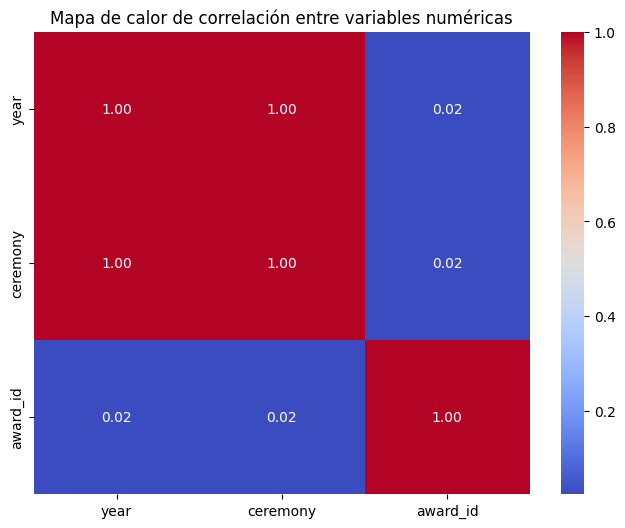

In [19]:
df_num = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(8,6))
corr = df_num.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de calor de correlación entre variables numéricas')
plt.show()

In [23]:
df.rename(columns=lambda x: x.strip(), inplace=True)  # elimina espacios al inicio o final
print(df.columns)

Index(['year', 'ceremony', 'award_id', 'award_type', 'award_name', 'work',
       'nominee', 'winner'],
      dtype='object')


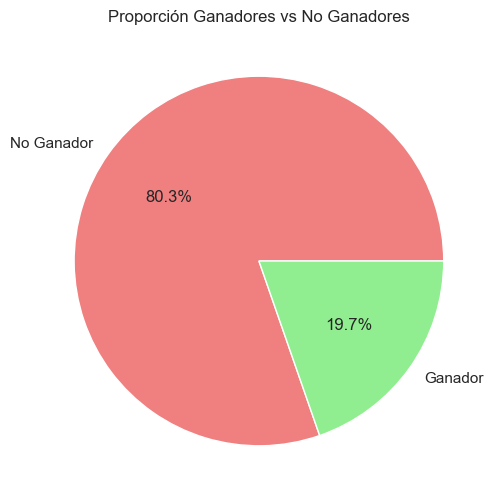

In [31]:
plt.figure(figsize=(6,6))
df['winner'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightcoral', 'lightgreen'], labels=['No Ganador', 'Ganador'])
plt.title('Proporción Ganadores vs No Ganadores')
plt.ylabel('')
plt.show()

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   year        61 non-null     int64 
 1   ceremony    61 non-null     int64 
 2   award_id    61 non-null     int64 
 3   award_type  61 non-null     object
 4   award_name  61 non-null     object
 5   work        61 non-null     object
 6   nominee     61 non-null     object
 7   winner      61 non-null     bool  
dtypes: bool(1), int64(3), object(4)
memory usage: 3.5+ KB
